In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import SmoothBivariateSpline, interp2d, griddata, RegularGridInterpolator, RectBivariateSpline

from vivarium import Artifact
import gbd_mapping as gbd
from db_queries import get_ids, get_population
from get_draws.api import get_draws

import sys, os.path
sys.path.append(os.path.abspath("../.."))
from pre_processing.id_helper import *

import lbwsg
import lbwsg_boe
import lsff_interventions
import demography
import test_lbwsg
import functions_for_all_nutrients as ffan

!date
!whoami

Mon Mar  8 23:26:47 PST 2021
ndbs


In [2]:
%load_ext autoreload
%autoreload 2

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Seed random generator and get 100 random draws

In [3]:
random_seed = 54321
rng = np.random.seed(random_seed)
draws = np.random.choice(range(1000), size=100, replace=False)
draws

array([926, 606,  84, 501, 459, 967, 709, 943,  20, 795, 536, 251, 135,
       555, 780, 862, 206, 837, 480, 870, 468, 479, 527,  62, 316, 552,
       996, 932, 939,  39,  75, 982, 851, 525, 745, 187,  64,  69, 987,
       578, 964, 764, 180, 148,  37, 588, 958, 803, 312, 440, 198, 548,
        73, 344, 189, 599, 547, 805, 911, 826, 124, 654, 276, 966, 556,
       720, 128, 371, 518,  99, 841, 510, 450, 455, 304, 969, 840, 876,
       573, 390, 817,  85, 681, 106, 962,  74, 721,  22, 719,  60, 431,
        91, 891, 429, 765, 250, 403, 378, 264, 185])

# Create a calculator object for Nigeria

In [4]:
%%time
filepath = 'lbwsg_data.hdf'
location = 'Nigeria'
vehicle = 'wheat flour'
covered_proportion_of_eats_fortifiable = 0.8 # High coverage level (scenarios = 0.2,0.5,0.8)
calc = lbwsg_boe.IronBirthweightCalculator(
    location, filepath, 2019, draws, vehicle, covered_proportion_of_eats_fortifiable,
    take_mean=False,
    risk_effect_class=lbwsg.LBWSGRiskEffectInterp2d,
    random_seed=random_seed)
print(calc.global_data)
print(calc.local_data)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.401795 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-splin

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.443986 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.259466 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
co

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.177154 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.186397 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.081924 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.000647 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

GlobalIronFortificationData(draw_numbers=array([926, 606,  84, 501, 459, 967, 709, 943,  20, 795, 536, 251, 135,
       555, 780, 862, 206, 837, 480, 870, 468, 479, 527,  62, 316, 552,
       996, 932, 939,  39,  75, 982, 851, 525, 745, 187,  64,  69, 987,
       578, 964, 764, 180, 148,  37, 588, 958, 803, 312, 440, 198, 548,
        73, 344, 189, 599, 547, 805, 911, 826, 124, 654, 276, 966, 556,
       720, 128, 371, 518,  99, 841, 510, 450, 455, 304, 969, 840, 876,
       573, 390, 817,  85, 681, 106, 962,  74, 721,  22, 719,  60, 431,
        91, 891, 429, 765, 250, 403, 378, 264, 185]), draws=Int64Index([926, 606,  84, 501, 459, 967, 709, 943,  20, 795, 536, 251, 135,
            555, 780, 862, 206, 837, 480, 870, 468, 479, 527,  62, 316, 552,
            996, 932, 939,  39,  75, 982, 851, 525, 745, 187,  64,  69, 987,
            578, 964, 764, 180, 148,  37, 588, 958, 803, 312, 440, 198, 548,
             73, 344, 189, 599, 547, 805, 911, 826, 124, 654, 276, 966, 556,
          

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.060119 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.011366 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

# Do a PIF calculation

In [5]:
%%time
calc.do_back_of_envelope_calculation(10_000)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 2min 17s, sys: 2.78 s, total: 2min 20s
Wall time: 2min 20s


In [6]:
calc.potential_impact_fraction.describe()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    100.000000
mean       0.003036
std        0.004139
min       -0.015646
25%        0.001287
50%        0.002710
75%        0.004240
max        0.017624
Name: lbwsg_relative_risk, dtype: float64

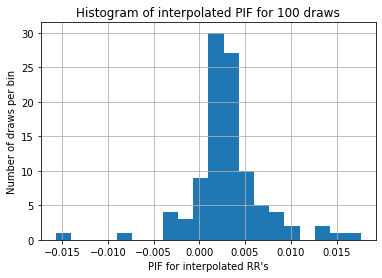

In [7]:
calc.potential_impact_fraction.hist(bins=20)
plt.xlabel("PIF for interpolated RR's")
plt.ylabel("Number of draws per bin")
plt.title("Histogram of interpolated PIF for 100 draws")
plt.show()

# Compare PIF with categorical version

In [8]:
calc.intervention_pop.head()

sex      age  age_group_id  lbwsg_category_propensity  \
draw simulant_id                                                             
926  0              Male  0.00274             2                   0.376358   
     1            Female  0.00274             2                   0.032372   
     2              Male  0.00274             2                   0.815900   
     3            Female  0.00274             2                   0.205790   
     4              Male  0.00274             2                   0.122393   

                  ga_propensity  bw_propensity  iron_fortification_propensity  \
draw simulant_id                                                                
926  0                 0.893912       0.995084                       0.224945   
     1                 0.395795       0.517020                       0.721739   
     2                 0.809995       0.858824                       0.422698   
     3                 0.040338       0.748373                       0.995267   
     4                 0.744642       0.114796                       0.382318   

                  mother_flour_consumption_propensity lbwsg_category  \
draw simulant_id                                                       
926  0                                       0.755590          cat51   
     1                                       0.550274          cat25   
     2                                       0.766135          cat55   
     3                                       0.003204          cat43   
     4                                       0.068494          cat40   

                  gestational_age  ...  treatment_deleted_birthweight  \
draw simulant_id                   ...                                  
926  0                  41.787824  ...                    3495.930366   
     1                  36.395795  ...                    1756.898584   
     2                  41.619989  ...                    3927.800263   
     3                  40.080675  ...                    2872.574924   
     4                  36.744642  ...                    2555.786489   

                  treatment_deleted_lbwsg_category valid_shift  \
draw simulant_id                                                 
926  0                                       cat51        True   
     1                                       cat25        True   
     2                                       cat55        True   
     3                                       cat43        True   
     4                                       cat40        True   

                  lbwsg_category_changed  mother_is_iron_fortified  \
draw simulant_id                                                     
926  0                              True                      True   
     1                             False                     False   
     2                             False                      True   
     3                             False                     False   
     4                             False                      True   

                  mother_daily_flour  birthweight_shift  \
draw simulant_id                                          
926  0                    203.365448          14.459566   
     1                      0.000000           0.000000   
     2                    209.713439          14.910917   
     3                      0.000000           0.000000   
     4                     21.233167           1.509708   

                  treated_treatment_deleted_birthweight  \
draw simulant_id                                          
926  0                                      3510.389931   
     1                                      1756.898584   
     2                                      3942.711179   
     3                                      2872.574924   
     4                                      2557.296197   

                  treated_lbwsg_category lbwsg_relative_risk  
draw simulant_id                            

## Create categorical RiskEffect object from same RR data, and use it to assign the categorical RR's to the baseline and intervention populations from above

In [9]:
cat_risk_effect = lbwsg.LBWSGRiskEffect(calc.lbwsg_effect.rr_data)
bpop, ipop = calc.baseline_pop, calc.intervention_pop
for pop in (bpop, ipop):
    cat_risk_effect.assign_relative_risk(
        pop, cat_colname='treated_lbwsg_category', rr_colname='lbwsg_relative_risk_for_category')
ipop.head()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sex      age  age_group_id  lbwsg_category_propensity  \
draw simulant_id                                                             
926  0              Male  0.00274             2                   0.376358   
     1            Female  0.00274             2                   0.032372   
     2              Male  0.00274             2                   0.815900   
     3            Female  0.00274             2                   0.205790   
     4              Male  0.00274             2                   0.122393   

                  ga_propensity  bw_propensity  iron_fortification_propensity  \
draw simulant_id                                                                
926  0                 0.893912       0.995084                       0.224945   
     1                 0.395795       0.517020                       0.721739   
     2                 0.809995       0.858824                       0.422698   
     3                 0.040338       0.748373                       0.995267   
     4                 0.744642       0.114796                       0.382318   

                  mother_flour_consumption_propensity lbwsg_category  \
draw simulant_id                                                       
926  0                                       0.755590          cat51   
     1                                       0.550274          cat25   
     2                                       0.766135          cat55   
     3                                       0.003204          cat43   
     4                                       0.068494          cat40   

                  gestational_age  ...  treatment_deleted_lbwsg_category  \
draw simulant_id                   ...                                     
926  0                  41.787824  ...                             cat51   
     1                  36.395795  ...                             cat25   
     2                  41.619989  ...                             cat55   
     3                  40.080675  ...                             cat43   
     4                  36.744642  ...                             cat40   

                  valid_shift lbwsg_category_changed  \
draw simulant_id                                       
926  0                   True                   True   
     1                   True                  False   
     2                   True                  False   
     3                   True                  False   
     4                   True                  False   

                  mother_is_iron_fortified  mother_daily_flour  \
draw simulant_id                                                 
926  0                                True          203.365448   
     1                               False            0.000000   
     2                                True          209.713439   
     3                               False            0.000000   
     4                                True           21.233167   

                  birthweight_shift  treated_treatment_deleted_birthweight  \
draw simulant_id                                                             
926  0                    14.459566                            3510.389931   
     1                     0.000000                            1756.898584   
     2                    14.910917                            3942.711179   
     3                     0.000000                            2872.574924   
     4                     1.509708                            2557.296197   

                  treated_lbwsg_category  lbwsg_relative_risk  \
draw simulant_id                                                
926  0                             cat55             1.022696   
     1                             cat25            29.810079   
     2                             cat55             1.015427   
     3                             cat43             1.387929   
     4                             cat40             4.134216   

         

## Calculate the PIF using the categorical RR's

In [10]:
categorical_pif = lbwsg_boe.potential_impact_fraction(bpop, ipop, 'lbwsg_relative_risk_for_category')
categorical_pif.describe()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    100.000000
mean       0.003810
std        0.002167
min       -0.001181
25%        0.002008
50%        0.003744
75%        0.005181
max        0.009407
Name: lbwsg_relative_risk_for_category, dtype: float64

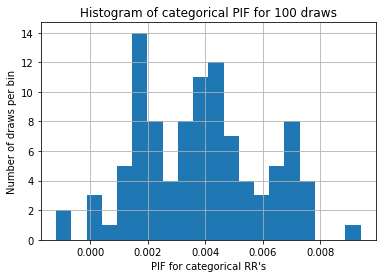

In [11]:
categorical_pif.hist(bins=20)
plt.xlabel("PIF for categorical RR's")
plt.ylabel("Number of draws per bin")
plt.title("Histogram of categorical PIF for 100 draws")
plt.show()

## Look at ratio of interpolated PIF to categorical PIF

In [12]:
(calc.potential_impact_fraction / categorical_pif).describe()

count    100.000000
mean       1.047861
std        3.450342
min      -19.697247
25%        0.295933
50%        0.712150
75%        1.428387
max       14.303114
dtype: float64

Text(0.5, 1.0, 'Histogram of ratios of interpolated PIF to categorical PIF')

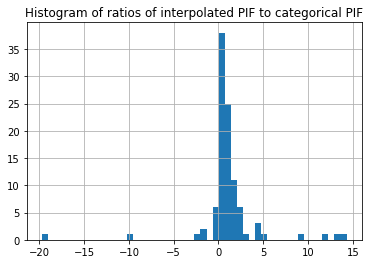

In [13]:
(calc.potential_impact_fraction / categorical_pif).hist(bins=50)
plt.title('Histogram of ratios of interpolated PIF to categorical PIF')

# Test my code with taking mean exposure and RR's over 1000 draws

In [14]:
mean_calc = lbwsg_boe.IronBirthweightCalculator(
    location, filepath, 2019, range(1000), vehicle, covered_proportion_of_eats_fortifiable,
    take_mean=True,
    risk_effect_class=lbwsg.LBWSGRiskEffectInterp2d,
    random_seed=random_seed)
print(mean_calc.global_data)
print(mean_calc.local_data)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())


GlobalIronFortificationData(draw_numbers=range(0, 1000), draws=CategoricalIndex(['mean_of_1000_draws'], categories=['mean_of_1000_draws'], ordered=False, name='draw', dtype='category'), birthweight_dose_response=draw
mean_of_1000_draws    16.7
Name: birthweight_dose_response, dtype: float64)
LocalIronFortificationData(location='Nigeria', location_id=214, iron_concentration=40, mean_daily_flour=137.12167623527284, mean_birthweight_shift=draw
mean_of_1000_draws    9.159728
Name: mean_birthweight_shift, dtype: float64, eats_fortified=0.16738810778481159, eats_fortifiable=0.47891433005989237, covered_proportion_of_eats_fortifiable=0.8)


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.139212 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.020004 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ier

## Calculate PIF for mean with a population of 100_000

In [15]:
%%time
mean_calc.do_back_of_envelope_calculation(100_000)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 15.8 s, sys: 340 ms, total: 16.2 s
Wall time: 16.2 s


In [16]:
mean_calc.potential_impact_fraction

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


draw
mean_of_1000_draws    0.004114
Name: lbwsg_relative_risk, dtype: float64

## Create a categorical RiskEffect for the mean, and compare the PIFs

In [17]:
mean_cat_risk_effect = lbwsg.LBWSGRiskEffect(mean_calc.lbwsg_effect.rr_data)
bpop, ipop = mean_calc.baseline_pop, mean_calc.intervention_pop
for pop in (bpop, ipop):
    mean_cat_risk_effect.assign_relative_risk(
        pop, cat_colname='treated_lbwsg_category', rr_colname='lbwsg_relative_risk_for_category')
ipop.head()

sex      age  age_group_id  \
draw               simulant_id                                  
mean_of_1000_draws 0            Female  0.00274             2   
                   1              Male  0.00274             2   
                   2            Female  0.00274             2   
                   3              Male  0.00274             2   
                   4              Male  0.00274             2   

                                lbwsg_category_propensity  ga_propensity  \
draw               simulant_id                                             
mean_of_1000_draws 0                             0.934248       0.272812   
                   1                             0.218929       0.883809   
                   2                             0.845655       0.557678   
                   3                             0.130252       0.416524   
                   4                             0.970048       0.028498   

                                bw_propensity  iron_fortification_propensity  \
draw               simulant_id                                                 
mean_of_1000_draws 0                 0.106565                       0.302059   
                   1                 0.784085                       0.249286   
                   2                 0.820190                       0.609273   
                   3                 0.663865                       0.065015   
                   4                 0.284105                       0.750346   

                                mother_flour_consumption_propensity  \
draw               simulant_id                                        
mean_of_1000_draws 0                                       0.341930   
                   1                                       0.407372   
                   2                                       0.387147   
                   3                                       0.277089   
                   4                                       0.464104   

                               lbwsg_category  gestational_age  ...  \
draw               simulant_id                                  ...   
mean_of_1000_draws 0                    cat56        40.545625  ...   
                   1                    cat43        41.767617  ...   
                   2                    cat55        41.115356  ...   
                   3                    cat40        36.416524  ...   
                   4                    cat56        40.056996  ...   

                                treatment_deleted_lbwsg_category  valid_shift  \
draw               simulant_id                                                  
mean_of_1000_draws 0                                       cat56         True   
                   1                                       cat43         True   
                   2                                       cat55         True   
                   3                                       cat40         True   
                   4                                       cat56         True   

                               lbwsg_category_changed  \
draw               simulant_id                          
mean_of_1000_draws 0                            False   
                   1                            False   
                   2                            False   
                   3                            False   
                   4                            False   

                                mother_is_iron_fortified  mother_daily_flour  \
draw               simulant_id                                                 
mean_of_1000_draws 0                                True           85.773727   
                   1                                True           91.663435   
                   2                               False            0.000000   
                   3                                True           79.938018   
                   4                     

In [18]:
mean_categorical_pif = lbwsg_boe.potential_impact_fraction(bpop, ipop, 'lbwsg_relative_risk_for_category')
mean_categorical_pif

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


draw
mean_of_1000_draws    0.001606
Name: lbwsg_relative_risk_for_category, dtype: float64

In [19]:
mean_calc.potential_impact_fraction / mean_categorical_pif

draw
mean_of_1000_draws    2.561398
dtype: float64

# Multiply PIFs by attributable ENN DALYS (from draw_0) to estimate DALYs averted

In [20]:
mean_calc.potential_impact_fraction * 9.465580e+06

draw
mean_of_1000_draws    38937.287636
Name: lbwsg_relative_risk, dtype: float64

In [21]:
mean_categorical_pif * 9.465580e+06

draw
mean_of_1000_draws    15201.578279
Name: lbwsg_relative_risk_for_category, dtype: float64

In [22]:
(calc.potential_impact_fraction * 9.465580e+06).describe()

count       100.000000
mean      28736.136986
std       39176.967481
min     -148101.003457
25%       12178.772446
50%       25655.754169
75%       40132.124347
max      166818.073448
Name: lbwsg_relative_risk, dtype: float64

In [23]:
(categorical_pif * 9.465580e+06).describe()

count      100.000000
mean     36061.969905
std      20515.303007
min     -11178.365654
25%      19003.657171
50%      35442.033502
75%      49040.004820
max      89040.060383
Name: lbwsg_relative_risk_for_category, dtype: float64

# Write a function to do all the steps for all 3 countries

In [87]:
filepath = 'lbwsg_data.hdf'
locations = ['Ethiopia', 'India', 'Nigeria']
coverage_levels = [0.2, 0.5, 0.8]
vehicle = 'wheat flour'
draws = np.random.choice(range(1000), size=100, replace=False)

def calculate_pifs(filepath, locations, draws, coverage_levels, num_simulants):
    location_ids = list_ids('location', *locations)
    year = 2025 # Year 2025 is needed for Ali's plotting code
    #     years = [2025]
#     # Make sure index level names match plotting function in Ali's code
#     index = pd.MultiIndex.from_product([location_ids, years, coverage_levels],
#                                        names=['location_id', 'year', 'coverage_level'])
    pifs = pd.DataFrame(index=draws)
    categorical_pifs = pd.DataFrame(index=draws)
    
    for location_id in location_ids:
        for coverage_level in coverage_levels:
            calc = lbwsg_boe.IronBirthweightCalculator(
                location_id, filepath, 2019, draws, vehicle, coverage_level,
                take_mean=False,
                risk_effect_class=lbwsg.LBWSGRiskEffectInterp2d,
                random_seed=None
            )
            calc.do_back_of_envelope_calculation(num_simulants)
            pifs[(location_id, year, coverage_level)] = calc.potential_impact_fraction
            
            cat_risk_effect = lbwsg.LBWSGRiskEffect(calc.lbwsg_effect.rr_data)
            bpop, ipop = calc.baseline_pop, calc.intervention_pop
            for pop in (bpop, ipop):
                cat_risk_effect.assign_relative_risk(
                    pop, cat_colname='treated_lbwsg_category', rr_colname='lbwsg_relative_risk_for_category'
                )
            categorical_pifs[(location_id, year, coverage_level)] = (
                lbwsg_boe.potential_impact_fraction(bpop, ipop, 'lbwsg_relative_risk_for_category')
            )
    for df in (pifs, categorical_pifs):
        # Make sure index level names and values match plotting function in Ali's code
        # df.rename_axis(index='draw', inplace=True)
        df.index = df.index.map({n: f"draw_{n}" for n in draws}).rename('draw')
        df.columns = pd.MultiIndex.from_tuples(df.columns, names=['location_id', 'year', 'coverage_level'])

    return pifs.T, categorical_pifs.T

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
%time pifs, categorical_pifs = calculate_pifs(filepath, locations, draws, coverage_levels, 10_000)
print(pifs.shape)
pifs.head()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.186495 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.241939 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.314021 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.238913 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.314021 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.238913 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.305216 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.161402 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.214708 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.433337 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
co

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.219411 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.109377 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.276497 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.068260 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.109377 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.141215 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.153905 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.210142 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.225540 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.186495 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.290724 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.371070 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.227526 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.237035 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.393955 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.359426 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.169720 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.322598 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.275186 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.313710 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


CPU times: user 20min 59s, sys: 20.4 s, total: 21min 19s
Wall time: 21min 26s
(9, 100)


draw                             draw_344  draw_248  draw_968  draw_780  \
location_id year coverage_level                                           
163         2025 0.2            -0.000603 -0.000246 -0.000289 -0.000416   
                 0.5            -0.000198 -0.000092 -0.000144 -0.000211   
                 0.8            -0.000543 -0.000160 -0.000006 -0.000070   
179         2025 0.2             0.000578  0.000204  0.000226  0.000279   
                 0.5             0.000614  0.001176  0.000548  0.000802   

draw                               draw_4  draw_190  draw_263  draw_552  \
location_id year coverage_level                                           
163         2025 0.2            -0.000121 -0.000265 -0.000694  0.001145   
                 0.5            -0.001733 -0.000190 -0.000128  0.000009   
                 0.8            -0.000013 -0.000007 -0.000021 -0.000023   
179         2025 0.2             0.000065  0.000087  0.000258 -0.000143   
                 0.5             0.000127  0.000952  0.000628  0.001341   

draw                             draw_986  draw_277  ...  draw_486  draw_333  \
location_id year coverage_level                      ...                       
163         2025 0.2            -0.000548 -0.000762  ... -0.000169 -0.000893   
                 0.5            -0.000583 -0.000147  ... -0.000335 -0.000077   
                 0.8             0.000036 -0.000028  ...  0.000148 -0.000010   
179         2025 0.2             0.000017 -0.000051  ... -0.000056  0.000124   
                 0.5             0.005332  0.000585  ... -0.000225  0.000881   

draw                             draw_933  draw_813  draw_156  draw_638  \
location_id year coverage_level                                           
163         2025 0.2            -0.000313 -0.000189 -0.000014 -0.000954   
                 0.5            -0.000091 -0.000180 -0.000078 -0.000263   
                 0.8            -0.000033 -0.000017 -0.000008  0.000026   
179         2025 0.2            -0.000730 -0.000050  0.000522 -0.000352   
                 0.5             0.000241  0.002002  0.000572 -0.001225   

draw                             draw_385  draw_994  draw_710  draw_924  
location_id year coverage_level                                          
163         2025 0.2            -0.000334 -0.000114 -0.001741 -0.000421  
                 0.5            -0.000105 -0.000086 -0.000159 -0.000214  
                 0.8            -0.000016 -0.000010 -0.000023 -0.000017  
179         2025 0.2             0.000069  0.000521  0.000414  0.000350  
                 0.5             0.000248  0.000561  0.002934  0.000145  

[5 rows x 100 columns]

In [89]:
pifs.T.describe()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


location_id            163                                 179              \
year                  2025                                2025               
coverage_level         0.2         0.5         0.8         0.2         0.5   
count           100.000000  100.000000  100.000000  100.000000  100.000000   
mean             -0.000409   -0.000238   -0.000026    0.000216    0.000762   
std               0.000716    0.000338    0.000070    0.000474    0.001591   
min              -0.004115   -0.002079   -0.000543   -0.000905   -0.002773   
25%              -0.000559   -0.000211   -0.000035    0.000018    0.000274   
50%              -0.000357   -0.000136   -0.000020    0.000167    0.000545   
75%              -0.000212   -0.000079   -0.000010    0.000314    0.000881   
max               0.003549    0.000009    0.000177    0.002853    0.013057   

location_id                        214                          
year                              2025                          
coverage_level         0.8         0.2         0.5         0.8  
count           100.000000  100.000000  100.000000  100.000000  
mean              0.001083   -0.000398    0.002161    0.002546  
std               0.002315    0.001140    0.003616    0.005233  
min              -0.009913   -0.005658   -0.007296   -0.010647  
25%               0.000251   -0.000568    0.000856   -0.000197  
50%               0.000868   -0.000121    0.001365    0.002374  
75%               0.001438    0.000223    0.002737    0.005190  
max               0.010207    0.001426    0.019867    0.019423

In [90]:
categorical_pifs.T.describe()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


location_id            163                                 179              \
year                  2025                                2025               
coverage_level         0.2         0.5         0.8         0.2         0.5   
count           100.000000  100.000000  100.000000  100.000000  100.000000   
mean             -0.000414   -0.000463   -0.000041    0.000054    0.000227   
std               0.000189    0.000286    0.000111    0.000077    0.000149   
min              -0.001142   -0.001033   -0.000580   -0.000152   -0.000184   
25%              -0.000507   -0.000662    0.000000    0.000007    0.000136   
50%              -0.000390   -0.000523    0.000000    0.000045    0.000196   
75%              -0.000317   -0.000301    0.000000    0.000082    0.000303   
max               0.000000    0.000000    0.000014    0.000400    0.000690   

location_id                        214                          
year                              2025                          
coverage_level         0.8         0.2         0.5         0.8  
count           100.000000  100.000000  100.000000  100.000000  
mean              0.000542   -0.000657    0.000068    0.002456  
std               0.000472    0.000438    0.000142    0.001106  
min              -0.000072   -0.001807   -0.000007    0.000885  
25%               0.000307   -0.000830    0.000007    0.001803  
50%               0.000422   -0.000628    0.000015    0.002045  
75%               0.000638   -0.000418    0.000023    0.003049  
max               0.001905   -0.000006    0.000553    0.006325

In [91]:
pifs.to_csv("ethiopia_nigeria_india_pifs_preliminary.csv")
categorical_pifs.to_csv("ethiopia_nigeria_india_categorical_pifs_preliminary.csv")

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Test updated g/day code

In [100]:
calc2 = lbwsg_boe.IronBirthweightCalculator(
    'Ethiopia', filepath, 2019, range(5), vehicle, 0.8,
    take_mean=False,
    risk_effect_class=lbwsg.LBWSGRiskEffectInterp2d,
    random_seed=None
)
print(calc2.local_data)
calc2.do_back_of_envelope_calculation(10)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients al

LocalIronFortificationData(location='Ethiopia', location_id=179, iron_concentration=30, mean_daily_flour=draw
0     94.825925
1    111.685004
2     82.279810
3     87.034150
4     84.488345
Name: mean_wheat_flour_consumption, dtype: float64, mean_birthweight_shift=draw
0    4.239993
1    5.137802
2    5.045040
3    4.966482
4    4.007220
Name: mean_birthweight_shift, dtype: float64, eats_fortified=draw
0    0.003936
1    0.013486
2    0.016245
3    0.000950
4    0.004474
Name: eats_fortified, dtype: float64, eats_fortifiable=draw
0    0.113755
1    0.159928
2    0.170501
3    0.082459
4    0.117339
Name: eats_fortifiable, dtype: float64, covered_proportion_of_eats_fortifiable=0.8)


In [176]:
calc2.potential_impact_fraction

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


draw
0    0.001877
1    0.002375
2    0.002685
3    0.000000
4    0.001709
Name: lbwsg_relative_risk, dtype: float64

# Re-run PIF calculation with g/day updates

In [101]:
%time pifs, categorical_pifs = calculate_pifs(filepath, locations, draws, coverage_levels, 10_000)
print(pifs.shape)
pifs.head()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients al

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.148282 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.556422 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.190166 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.146965 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.157064 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.136408 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.275186 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.313710 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.452141 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.109027 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.204071 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.473894 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.103588 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,12 m=58 fp=0.083320 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
co

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.533302 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.095595 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.193358 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.281076 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.090250 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.116754 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.448796 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.133418 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
co

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.460192 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.161402 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.157064 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline


/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=58 fp=0.180838 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.185971 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
c

CPU times: user 20min 42s, sys: 19.1 s, total: 21min 1s
Wall time: 21min 8s
(9, 100)


draw                             draw_344  draw_248  draw_968  draw_780  \
location_id year coverage_level                                           
163         2025 0.2            -0.000225 -0.000923 -0.000187 -0.000448   
                 0.5            -0.001229  0.000661 -0.000196 -0.000500   
                 0.8            -0.000139 -0.000178 -0.000049 -0.000164   
179         2025 0.2             0.000402 -0.000114  0.000037  0.000135   
                 0.5             0.000194  0.000325  0.000207  0.000441   

draw                               draw_4  draw_190  draw_263  draw_552  \
location_id year coverage_level                                           
163         2025 0.2            -0.000529  0.002265 -0.000541 -0.000236   
                 0.5            -0.000796 -0.000143 -0.000069  0.000261   
                 0.8            -0.000130 -0.000187 -0.000038 -0.000016   
179         2025 0.2             0.000188  0.000067  0.000039  0.000837   
                 0.5             0.001054  0.000260  0.001215  0.000584   

draw                             draw_986  draw_277  ...  draw_486  draw_333  \
location_id year coverage_level                      ...                       
163         2025 0.2            -0.000251 -0.000295  ... -0.001527 -0.000384   
                 0.5            -0.000476 -0.000245  ... -0.000141 -0.000200   
                 0.8            -0.000038 -0.000066  ... -0.000043 -0.000067   
179         2025 0.2             0.000263  0.000308  ... -0.000467  0.000059   
                 0.5             0.000991 -0.003406  ...  0.000123  0.000508   

draw                             draw_933  draw_813  draw_156  draw_638  \
location_id year coverage_level                                           
163         2025 0.2            -0.001537 -0.000169 -0.000247 -0.000403   
                 0.5            -0.000456 -0.000185  0.000042 -0.000284   
                 0.8            -0.000040 -0.000021 -0.000017 -0.000144   
179         2025 0.2             0.000016  0.000038  0.000021 -0.000648   
                 0.5            -0.000018  0.000196 -0.000537  0.000086   

draw                             draw_385  draw_994  draw_710  draw_924  
location_id year coverage_level                                          
163         2025 0.2            -0.000161 -0.000381 -0.000945 -0.000465  
                 0.5            -0.000093 -0.000236 -0.000140 -0.000491  
                 0.8            -0.000066  0.000049 -0.000027 -0.000024  
179         2025 0.2            -0.000003  0.000121 -0.000028  0.000002  
                 0.5             0.000079  0.000244  0.000074  0.000507  

[5 rows x 100 columns]

In [116]:
categorical_pifs

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


draw                             draw_344  draw_248  draw_968  draw_780  \
location_id year coverage_level                                           
163         2025 0.2            -0.000227 -0.000725 -0.000231 -0.000981   
                 0.5            -0.000011 -0.000011 -0.000055 -0.000495   
                 0.8            -0.000079  0.000000  0.000000  0.000000   
179         2025 0.2             0.000008  0.000006 -0.000044  0.000007   
                 0.5             0.000007  0.000358  0.000000  0.000000   
                 0.8             0.000816  0.000245  0.003908  0.001688   
214         2025 0.2            -0.000023 -0.000026 -0.000014 -0.000019   
                 0.5             0.000057  0.000098  0.000037  0.000024   
                 0.8             0.000018  0.000219  0.000080  0.000072   

draw                               draw_4  draw_190  draw_263  draw_552  \
location_id year coverage_level                                           
163         2025 0.2            -0.000836 -0.000925 -0.000911 -0.000147   
                 0.5            -0.000419 -0.000013 -0.000011 -0.000013   
                 0.8             0.000000  0.000000  0.000000  0.000000   
179         2025 0.2             0.000000  0.000144  0.000000  0.000000   
                 0.5             0.000312  0.000006  0.000264  0.000000   
                 0.8            -0.000753 -0.000638  0.000022  0.003418   
214         2025 0.2            -0.000045 -0.000015 -0.000010 -0.000024   
                 0.5            -0.000024  0.000076  0.000004  0.000039   
                 0.8             0.000015  0.000084  0.000017  0.000030   

draw                             draw_986  draw_277  ...  draw_486  draw_333  \
location_id year coverage_level                      ...                       
163         2025 0.2            -0.000588 -0.000386  ... -0.000660 -0.000342   
                 0.5            -0.000721 -0.000010  ... -0.000066 -0.000476   
                 0.8             0.000000  0.000000  ...  0.000000  0.000000   
179         2025 0.2             0.000005 -0.000007  ...  0.000005  0.000000   
                 0.5             0.000545  0.000411  ...  0.000018  0.000552   
                 0.8             0.000008  0.000028  ...  0.000338  0.002896   
214         2025 0.2            -0.000024 -0.000012  ... -0.000019 -0.000042   
                 0.5             0.000050  0.000073  ...  0.000045  0.000020   
                 0.8             0.000089  0.000104  ...  0.000054  0.000026   

draw                             draw_933  draw_813  draw_156  draw_638  \
location_id year coverage_level                                           
163         2025 0.2            -0.001198 -0.000971 -0.000525 -0.000654   
                 0.5            -0.000410 -0.000412 -0.000264 -0.000630   
                 0.8             0.000000  0.000000  0.000000  0.000000   
179         2025 0.2             0.000109  0.000000  0.000000  0.000130   
                 0.5             0.000000  0.000000  0.000396  0.000069   
                 0.8             0.002323  0.000778  0.004447 -0.000013   
214         2025 0.2            -0.000028 -0.000072 -0.000023 -0.000010   
                 0.5             0.000010 -0.000007  0.000002  0.000109   
                 0.8             0.000082  0.000048  0.000042  0.000006   

draw                             draw_385  draw_994  draw_710  draw_924  
location_id year coverage_level                                          
163         2025 0.2            -0.000302 -0.001291 -0.000933 -0.000594  
                 0.5            -0.000013 -0.000016 -0.000022 -0.000637  
                 0.8             0.000000  0.000000  0.000000  0.000000  
179         2025 0.2            -0.000007  0.000076  0.000000  0.000154  
                 0.5             0.000472  0.000000  0.000000  0.000000  
                 0.8             0.000007  0.004917  0.003252  0.003097  
214         2025 0.2            -0.000070 -0.0000

In [117]:
names_to_ids('location', *locations)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


location_name
India       163
Ethiopia    179
Nigeria     214
Name: location_id, dtype: int64

In [102]:
pifs.T.describe()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


location_id            163                                 179              \
year                  2025                                2025               
coverage_level         0.2         0.5         0.8         0.2         0.5   
count           100.000000  100.000000  100.000000  100.000000  100.000000   
mean             -0.000188   -0.000228   -0.000058    0.000108    0.000513   
std               0.001129    0.000393    0.000071    0.000357    0.001502   
min              -0.004232   -0.002110   -0.000417   -0.001103   -0.003406   
25%              -0.000426   -0.000328   -0.000070    0.000018    0.000056   
50%              -0.000247   -0.000196   -0.000045    0.000069    0.000302   
75%              -0.000150   -0.000107   -0.000021    0.000158    0.000586   
max               0.007158    0.002054    0.000155    0.002089    0.012108   

location_id                        214                          
year                              2025                          
coverage_level         0.8         0.2         0.5         0.8  
count           100.000000  100.000000  100.000000  100.000000  
mean              0.000745   -0.000076    0.000344    0.000982  
std               0.001666    0.000328    0.000498    0.000996  
min              -0.005190   -0.000952   -0.002107   -0.001735  
25%               0.000168   -0.000213    0.000183    0.000461  
50%               0.000552   -0.000119    0.000303    0.000826  
75%               0.000962   -0.000006    0.000519    0.001323  
max               0.009089    0.001226    0.001649    0.005318

In [103]:
categorical_pifs.T.describe()

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


location_id            163                                   179              \
year                  2025                                  2025               
coverage_level         0.2         0.5           0.8         0.2         0.5   
count           100.000000  100.000000  1.000000e+02  100.000000  100.000000   
mean             -0.000673   -0.000156 -6.902270e-07    0.000055    0.000168   
std               0.000377    0.000242  7.965515e-06    0.000100    0.000199   
min              -0.001827   -0.000788 -7.893583e-05   -0.000053   -0.000012   
25%              -0.000892   -0.000224  0.000000e+00    0.000000    0.000000   
50%              -0.000710   -0.000016  0.000000e+00    0.000006    0.000025   
75%              -0.000406   -0.000011  0.000000e+00    0.000077    0.000363   
max               0.000088    0.000006  9.913127e-06    0.000463    0.000579   

location_id                        214                          
year                              2025                          
coverage_level         0.8         0.2         0.5         0.8  
count           100.000000  100.000000  100.000000  100.000000  
mean              0.001595   -0.000027    0.000035    0.000066  
std               0.001890    0.000019    0.000038    0.000055  
min              -0.001502   -0.000094   -0.000024   -0.000135  
25%               0.000014   -0.000031    0.000005    0.000028  
50%               0.000716   -0.000024    0.000025    0.000059  
75%               0.002965   -0.000017    0.000060    0.000096  
max               0.006729    0.000006    0.000157    0.000276

In [104]:
pifs.to_csv("ethiopia_nigeria_india_pifs.csv")
categorical_pifs.to_csv("ethiopia_nigeria_india_categorical_pifs.csv")

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


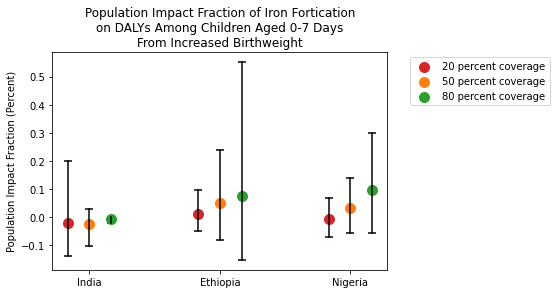

In [173]:
ffan.make_india_ethiopia_nigeria_plots(
    100*pifs, 'Iron', 'pifs', coverage_levels, 'From Increased Birthweight'
)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


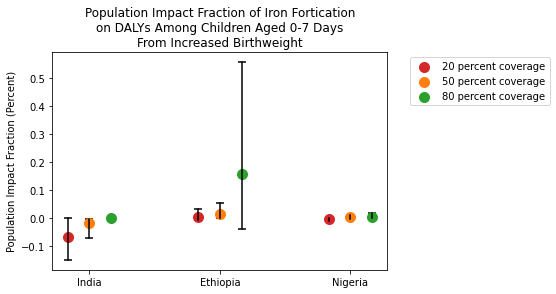

In [132]:
ffan.make_india_ethiopia_nigeria_plots(
    100*categorical_pifs, 'Iron', 'pifs', coverage_levels, 'From Increased Birthweight')

# Compute Averted YLLs

In [118]:
ylls = pd.read_hdf('lbwsg_data.hdf', key='/gbd_2019/burden/ylls/ethiopia_india_nigeria_all_causes')
ylls.head()

,age_group_id,cause_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,...,draw_996,draw_997,draw_998,draw_999,location_id,measure_id,metric_id,rei_id,sex_id,year_id
0,2,294,1.607176e+07,1.553478e+07,1.362010e+07,1.702969e+07,1.423623e+07,1.394666e+07,1.346334e+07,1.664794e+07,...,1.349761e+07,1.559937e+07,1.302062e+07,1.277585e+07,163,4,1,339,2,2019
1,3,294,3.654577e+06,3.381968e+06,3.208345e+06,3.919925e+06,3.264203e+06,3.167866e+06,3.119290e+06,3.911605e+06,...,3.198381e+06,3.595541e+06,3.032431e+06,2.823214e+06,163,4,1,339,2,2019
2,4,294,9.688128e+04,1.108191e+05,1.019397e+05,1.291074e+05,9.233955e+04,1.092226e+05,1.021102e+05,1.362216e+05,...,1.273969e+05,1.263009e+05,1.128781e+05,1.097600e+05,163,4,1,339,2,2019
3,5,294,4.753826e+03,4.323482e+03,3.400988e+03,4.700050e+03,4.194183e+03,5.112577e+03,4.837213e+03,5.109471e+03,...,4.326353e+03,3.610302e+03,4.313051e+03,5.771392e+03,163,4,1,339,2,2019
4,2,294,1.989153e+07,1.852400e+07,1.740188e+07,2.171137e+07,1.755614e+07,1.660775e+07,1.651382e+07,2.051031e+07,...,1.702384e+07,1.932068e+07,1.586808e+07,1.579946e+07,163,4,1,339,1,2019


In [119]:
def format_yll_data(ylls, draws=None):
    if draws is None:
        draw_cols = ylls.filter(like='draw').columns.to_list()
    else:
        draw_cols = [f"draw_{n}" for n in draws]
    ylls = (
        ylls
        .query("age_group_id==2 and metric_id==1")
        .groupby('location_id')[draw_cols]
        .sum() # Aggregate over sex_id
    )
    return ylls
            
format_yll_data(ylls)

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,3.596329e+07,3.405878e+07,3.102198e+07,3.874106e+07,3.179238e+07,3.055441e+07,2.997716e+07,3.715825e+07,3.342801e+07,3.183534e+07,...,3.633083e+07,3.173986e+07,3.350270e+07,2.912570e+07,2.886791e+07,3.635990e+07,3.052145e+07,3.492005e+07,2.888870e+07,2.857531e+07
179,5.138575e+06,5.231974e+06,4.985341e+06,6.268118e+06,4.658356e+06,4.833609e+06,4.483427e+06,5.200409e+06,5.262935e+06,4.824056e+06,...,4.986510e+06,4.604509e+06,4.599540e+06,4.004509e+06,3.883417e+06,5.133666e+06,3.997324e+06,4.774526e+06,4.038244e+06,4.494253e+06
214,1.598250e+07,1.570791e+07,1.529637e+07,1.908487e+07,1.427370e+07,1.473181e+07,1.388635e+07,1.605344e+07,1.597809e+07,1.474389e+07,...,1.537431e+07,1.381486e+07,1.410075e+07,1.231145e+07,1.200490e+07,1.567423e+07,1.236180e+07,1.426402e+07,1.253501e+07,1.338033e+07


In [121]:
ylls_formatted = format_yll_data(ylls, draws)
ylls_formatted

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,draw_344,draw_248,draw_968,draw_780,draw_4,draw_190,draw_263,draw_552,draw_986,draw_277,...,draw_486,draw_333,draw_933,draw_813,draw_156,draw_638,draw_385,draw_994,draw_710,draw_924
location_id,,,,,,,,,,,,,,,,,,,,,
163,3.436380e+07,3.403898e+07,3.483746e+07,3.193936e+07,3.501233e+07,3.550652e+07,3.314046e+07,2.983281e+07,3.157452e+07,3.313863e+07,...,3.572761e+07,3.120855e+07,2.642169e+07,3.611676e+07,2.776625e+07,3.107906e+07,3.180782e+07,2.886791e+07,3.037632e+07,3.599652e+07
179,5.328844e+06,5.013946e+06,5.002730e+06,4.598788e+06,5.384972e+06,5.048025e+06,4.961725e+06,4.317208e+06,4.426860e+06,5.600731e+06,...,5.001239e+06,5.135115e+06,3.956585e+06,5.432628e+06,3.889699e+06,4.323742e+06,4.473397e+06,3.883417e+06,4.314463e+06,6.059946e+06
214,1.621535e+07,1.586954e+07,1.506459e+07,1.429174e+07,1.611264e+07,1.549394e+07,1.545684e+07,1.343270e+07,1.344830e+07,1.725578e+07,...,1.553226e+07,1.582374e+07,1.228849e+07,1.628120e+07,1.250170e+07,1.328601e+07,1.391176e+07,1.200490e+07,1.318068e+07,1.844248e+07


In [125]:
averted_ylls = pifs * ylls_formatted
averted_ylls

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


draw                                 draw_344      draw_248      draw_968  \
location_id year coverage_level                                             
163         2025 0.2             -7718.748994 -31412.210427  -6519.472165   
                 0.5            -42224.018376  22500.617805  -6832.029267   
                 0.8             -4793.021062  -6052.386684  -1693.781264   
179         2025 0.2              2141.627821   -570.128320    186.017162   
                 0.5              1034.192982   1629.271113   1035.098050   
                 0.8              9226.031710  -1587.896800   4568.386587   
214         2025 0.2             -2329.323003   5324.976939  -1704.695280   
                 0.5              6140.983835   -946.723361   8209.902691   
                 0.8             13899.148446  37278.658641  15801.581559   

draw                                 draw_780        draw_4      draw_190  \
location_id year coverage_level                                             
163         2025 0.2            -14309.756947 -18516.020918  80415.383108   
                 0.5            -15959.576723 -27885.728989  -5087.640150   
                 0.8             -5230.538560  -4562.323956  -6630.265095   
179         2025 0.2               621.676230   1010.160097    336.006746   
                 0.5              2026.949546   5673.266303   1314.715176   
                 0.8              4777.144764   1057.657613    877.918606   
214         2025 0.2             -6065.080902   5326.100442  -2128.431746   
                 0.5              4994.269534  24512.204287   5016.813113   
                 0.8              6875.083155  32614.022824  10373.777922   

draw                                 draw_263      draw_552      draw_986  \
location_id year coverage_level                                             
163         2025 0.2            -17926.828395  -7049.107502  -7927.418860   
                 0.5             -2297.928658   7799.090385 -15023.844164   
                 0.8             -1259.304387   -487.279643  -1186.839949   
179         2025 0.2               194.309104   3613.585676   1162.337579   
                 0.5              6026.888966   2521.830017   4388.391529   
                 0.8              2075.979961  -3262.309167   3189.656244   
214         2025 0.2             -1831.240162   4047.897450  -2239.594396   
                 0.5             11665.538960   2729.152605   2112.137020   
                 0.8              7793.037532  13672.249649  20697.025814   

draw                                 draw_277  ...      draw_486  \
location_id year coverage_level                ...                 
163         2025 0.2             -9766.735869  ... -54546.767209   
                 0.5             -8132.518337  ...  -5035.427243   
                 0.8             -2191.861236  ...  -1531.522073   
179         2025 0.2              1722.247460  ...  -2335.370834   
                 0.5            -19077.647971  ...    613.214086   
                 0.8             -3762.952412  ... -10669.512538   
214         2025 0.2             -7394.077629  ...  -1421.005149   
                 0.5              3935.276560  ...  12264.099952   
                 0.8             -6013.877610  ...   6225.212740   

draw                                 draw_333      draw_933      draw_813  \
location_id year coverage_level                                             
163         2025 0.2            -11983.891797 -40600.749692  -6102.262699   
                 0.5             -6227.452657 -12040.705580  -6690.754707   
                 0.8             -2099.022718  -1058.171604   -749.737074   
179         2025 0.2               301.462674     62.392673    208.013120   
                 0.5              2609.180289    -72.410997   1063.723251   
                 0.8              7957.138271  31080.675077   3873.652826   
214         2025 0.2             -2224.484250  -3160.229981  -7347.308199   
              

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


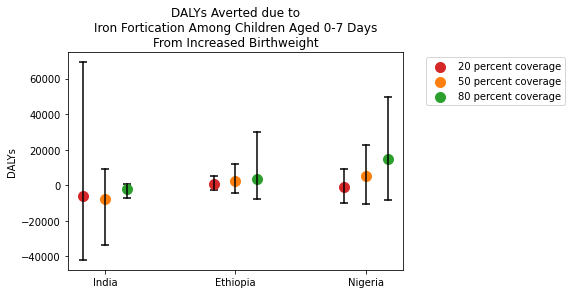

In [174]:
ffan.make_india_ethiopia_nigeria_plots(
    averted_ylls, 'Iron', 'counts', coverage_levels, 'From Increased Birthweight',
)

# Calculate averted YLL rates

In [147]:
location_ids=list_ids('location', *locations)
total_pop = get_population(
    age_group_id=2,
    location_id=location_ids,
    year_id=2019,
    gbd_round_id=6,
    status='best',
    decomp_step='step5'
)
total_pop

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_group_id,location_id,year_id,sex_id,population,run_id
0,2,163,2019,3,447211.015695,192
1,2,179,2019,3,69511.359804,192
2,2,214,2019,3,143303.676575,192


In [151]:
total_pop = total_pop.set_index('location_id')['population']
total_pop

location_id
163    447211.015695
179     69511.359804
214    143303.676575
Name: population, dtype: float64

In [155]:
# Broadcasting requires converting ylls to Series by stacking since column names don't match population
averted_yll_rate = (averted_ylls.stack() / total_pop).unstack()
averted_yll_rate

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


draw                             draw_344  draw_248  draw_968  draw_780  \
location_id year coverage_level                                           
163         2025 0.2            -0.017260 -0.070240 -0.014578 -0.031998   
                 0.5            -0.094416  0.050313 -0.015277 -0.035687   
                 0.8            -0.010718 -0.013534 -0.003787 -0.011696   
179         2025 0.2             0.030810 -0.008202  0.002676  0.008944   
                 0.5             0.014878  0.023439  0.014891  0.029160   
                 0.8             0.132727 -0.022844  0.065721  0.068725   
214         2025 0.2            -0.016254  0.037159 -0.011896 -0.042323   
                 0.5             0.042853 -0.006606  0.057290  0.034851   
                 0.8             0.096991  0.260137  0.110266  0.047976   

draw                               draw_4  draw_190  draw_263  draw_552  \
location_id year coverage_level                                           
163         2025 0.2            -0.041403  0.179815 -0.040086 -0.015762   
                 0.5            -0.062355 -0.011376 -0.005138  0.017439   
                 0.8            -0.010202 -0.014826 -0.002816 -0.001090   
179         2025 0.2             0.014532  0.004834  0.002795  0.051986   
                 0.5             0.081616  0.018914  0.086704  0.036279   
                 0.8             0.015216  0.012630  0.029865 -0.046932   
214         2025 0.2             0.037167 -0.014853 -0.012779  0.028247   
                 0.5             0.171051  0.035008  0.081404  0.019045   
                 0.8             0.227587  0.072390  0.054381  0.095408   

draw                             draw_986  draw_277  ...  draw_486  draw_333  \
location_id year coverage_level                      ...                       
163         2025 0.2            -0.017726 -0.021839  ... -0.121971 -0.026797   
                 0.5            -0.033595 -0.018185  ... -0.011260 -0.013925   
                 0.8            -0.002654 -0.004901  ... -0.003425 -0.004694   
179         2025 0.2             0.016722  0.024776  ... -0.033597  0.004337   
                 0.5             0.063132 -0.274454  ...  0.008822  0.037536   
                 0.8             0.045887 -0.054134  ... -0.153493  0.114472   
214         2025 0.2            -0.015628 -0.051597  ... -0.009916 -0.015523   
                 0.5             0.014739  0.027461  ...  0.085581  0.064455   
                 0.8             0.144428 -0.041966  ...  0.043441  0.103837   

draw                             draw_933  draw_813  draw_156  draw_638  \
location_id year coverage_level                                           
163         2025 0.2            -0.090787 -0.013645 -0.015334 -0.028013   
                 0.5            -0.026924 -0.014961  0.002597 -0.019714   
                 0.8            -0.002366 -0.001676 -0.001054 -0.010011   
179         2025 0.2             0.000898  0.002993  0.001184 -0.040306   
                 0.5            -0.001042  0.015303 -0.030039  0.005372   
                 0.8             0.447131  0.055727 -0.010532 -0.037610   
214         2025 0.2            -0.022053 -0.051271  0.005546 -0.010080   
                 0.5             0.044573  0.031008 -0.017292  0.019655   
                 0.8             0.049863  0.254033  0.018751  0.013779   

draw                             draw_385  draw_994  draw_710  draw_924  
location_id year coverage_level                                          
163         2025 0.2            -0.011451 -0.024594 -0.064193 -0.037442  
                 0.5            -0.006639 -0.015235 -0.009519 -0.039510  
                 0.8            -0.004725  0.003177 -0.001835 -0.001896  
179         2025 0.2            -0.000174  0.006779 -0.001752  0.000182  
                 0.5             0.005060  0.013631  0.004590  0.044208  
                 0.8             0.010997  0.046103 -0.017347  0.095051  
214         2025 0.2             0.002263  0.0573

/ihme/homes/ndbs/miniconda3/envs/lsff-iron-38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


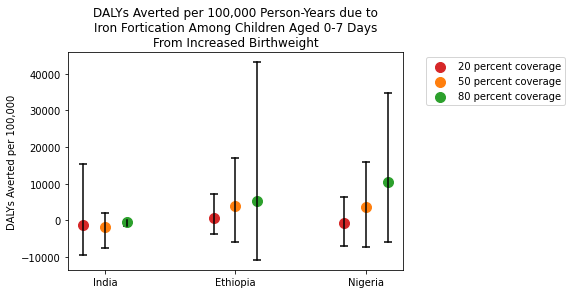

In [159]:
ffan.make_india_ethiopia_nigeria_plots(
    100_000*averted_yll_rate, 'Iron', 'rates', coverage_levels, 'From Increased Birthweight',
)